In [87]:
import pandas as pd
from numpy import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
len(data)

50

In [5]:
df = pd.get_dummies(data)

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   R&D Spend         50 non-null     float64
 1   Administration    50 non-null     float64
 2   Marketing Spend   50 non-null     float64
 3   Profit            50 non-null     float64
 4   State_California  50 non-null     uint8  
 5   State_Florida     50 non-null     uint8  
 6   State_New York    50 non-null     uint8  
dtypes: float64(4), uint8(3)
memory usage: 1.8 KB


In [8]:
df.isnull().sum()

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

In [9]:
dependent_variable = 'Profit'

In [10]:
## create a independent variables

independent_variables = df.columns.tolist()

In [11]:
independent_variables.remove(dependent_variable)

In [12]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'State_California',
 'State_Florida',
 'State_New York']

In [13]:
## create the data of independent variables

x = df[independent_variables].values


## create the dependent variable data

y = df[dependent_variable].values

In [14]:
pd.DataFrame(x).head()

,0,1,2,3,4,5
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


In [39]:
 y = pd.DataFrame(y).head()

In [40]:
y

,0
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [16]:
## splitting the data into the training set and test set

x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.20 , random_state = 0)

In [17]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5
0,55493.95,103057.49,214634.81,0.0,1.0,0.0
1,46014.02,85047.44,205517.64,0.0,0.0,1.0
2,75328.87,144135.98,134050.07,0.0,1.0,0.0
3,46426.07,157693.92,210797.67,1.0,0.0,0.0
4,91749.16,114175.79,294919.57,0.0,1.0,0.0


In [18]:
## Transforming data

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 1.        ,
        0.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 0.        , 0.        ,
        1.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 1.        ,
        0.        ],
       [0.2807759 , 1.        , 0.44680961, 1.        , 0.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 1.        ,
        0.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 1.        ,
        0.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 1.        ,
        0.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 0.        , 0.        ,
        1.        ],
       [0.00327821, 0.00432296, 0.        , 0.        , 0.        ,
        1.        ],
       [0.39676926, 0.95618996, 0.22709197, 0.        , 0.        ,
        1.        ]])

In [22]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,0.335617,0.486552,0.454943,0.0,1.0,0.0
1,0.278284,0.317301,0.435618,0.0,0.0,1.0
2,0.455574,0.872589,0.284134,0.0,1.0,0.0
3,0.280776,1.000000,0.446810,1.0,0.0,0.0
4,0.554881,0.591036,0.625116,0.0,1.0,0.0
5,0.788018,0.885690,0.686493,0.0,1.0,0.0
6,0.725394,0.989226,0.543708,0.0,1.0,0.0
7,0.006049,0.684798,0.004036,0.0,0.0,1.0
8,0.003278,0.004323,0.000000,0.0,0.0,1.0
9,0.396769,0.956190,0.227092,0.0,0.0,1.0


In [23]:
## fitting multiple linear regression to the training set

regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [24]:
regressor.score(x_train , y_train)

0.9501847627493607

In [25]:
regressor.score(x_test , y_test)

0.9347068473282423

In [26]:
## predicting the test set results

y_pred = regressor.predict(x_test)

In [27]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [27]:
pd.DataFrame(y_pred)

,0
0,103015.201598
1,132582.277608
2,132447.738452
3,71976.098513
4,178537.482211
5,116161.242302
6,67851.692097
7,98791.733747
8,113969.435330
9,167921.065696


In [28]:
import seaborn as sn

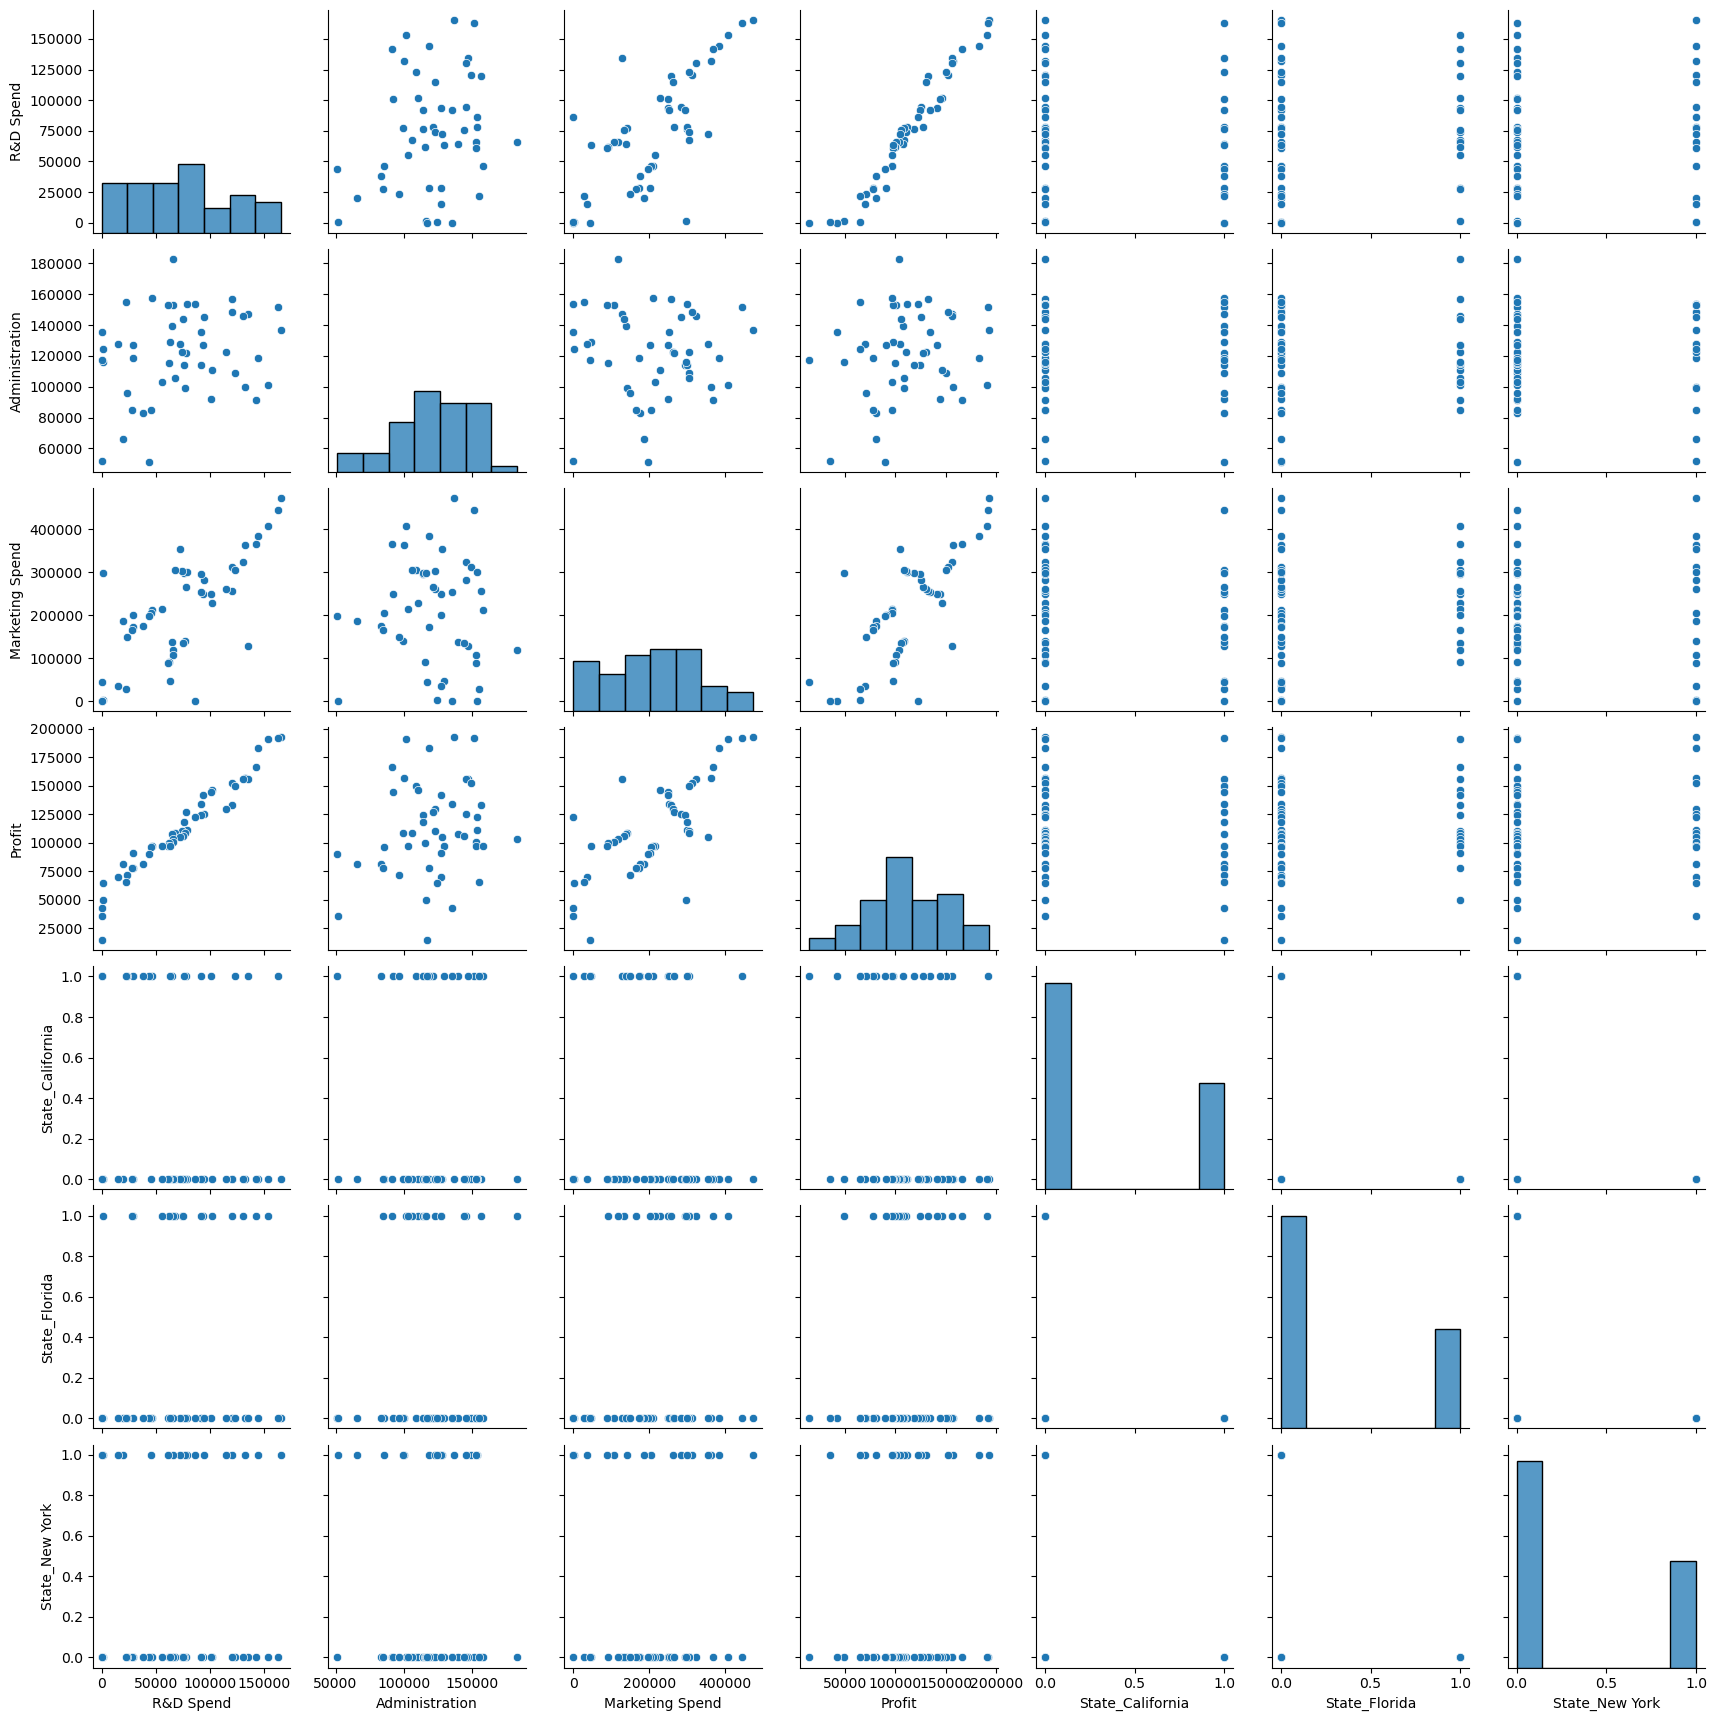

In [35]:
sn.pairplot(df)

C:\Users\user\AppData\Local\Temp\ipykernel_5788\3258471590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(y_pred)


<Axes: ylabel='Density'>

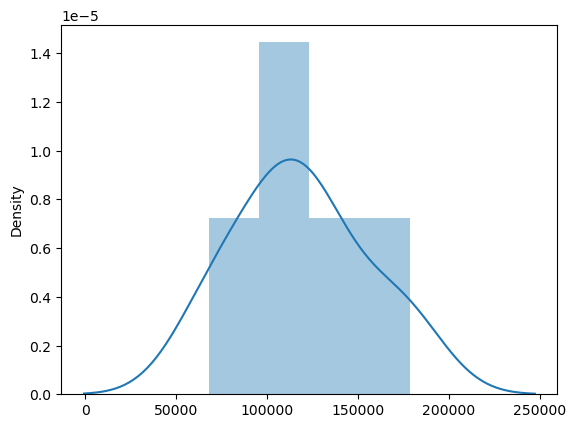

In [66]:
sn.distplot(y_pred)

In [67]:
np.sqrt(mean_squared_error(y_test , y_pred))

9137.990152794957

In [72]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


<Axes: xlabel='Marketing Spend', ylabel='Profit'>

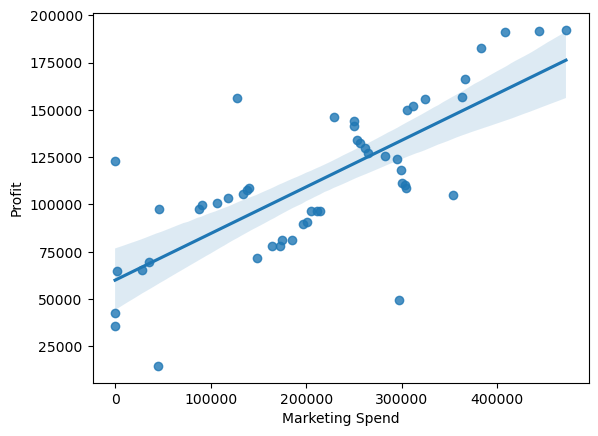

In [78]:
sn.regplot(x = 'Marketing Spend' ,y =  'Profit' , data = df) 

<Axes: xlabel='R&D Spend', ylabel='Profit'>

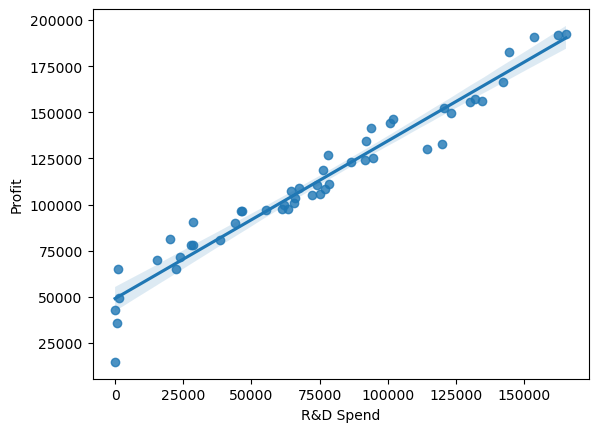

In [80]:
sn.regplot(x = 'R&D Spend' , y = 'Profit' , data = df)

In [29]:
r2_score(y_test , y_pred)

0.9347068473282423

In [56]:
import statsmodels.formula.api as smf

In [57]:
df4 = smf.ols("y~x" , data = df ).fit()

In [58]:
df4

In [59]:
df4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.34e-27
Time:                        00:50:23   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
x[0]           0.8060      0.046     17.369      0.000       0.712       0.900
x[1]          -0.0270      0.052     -0.517      0.608      -0.132       0.078
x[2]           0.0270      0.017      1.574      0.123      -0.008       0.062
x[3]        1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
x[4]        1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
x[5]        1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.98e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""